# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [149]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [150]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

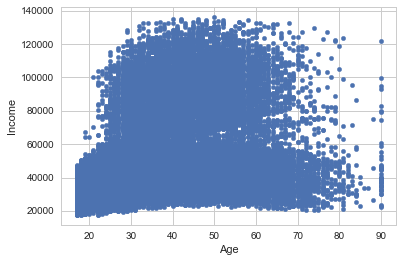

In [151]:
income.plot(x='Age', y='Income', kind='scatter')

In [161]:
y = income['Income']
X = income[['Age']]

#y_mean, y_std = y.mean(), y.std()
#X_mean, X_std = X.mean(), X.std()

#y = (y - y_mean)/ y_std
#X = (X - X_mean)/ X_std

#lt.scatter(X, y)
#lt.xlabel('Age')
#lt.ylabel('Income')

np.corrcoef(income['Age'],income['Income'])

array([[1.       , 0.2904083],
       [0.2904083, 1.       ]])

La edad y el ingreso tienen una relación directamente proporcional: a mayor edad, mayor ingreso. Sin emabargo la relación no es fuerte.

In [145]:
# create X and y
#n_samples = X.shape[0]
#X_ = np.c_[np.ones(n_samples), X]
#X_.shape

### Using OLS

In [162]:
# import
from sklearn.linear_model import LinearRegression
# Initialize
linreg = LinearRegression(fit_intercept=False)
# Fit
linreg.fit(X, y)
linreg.coef_

array([1291.82348999])

In [164]:
edad = [[30],[40]]
pred = linreg.predict(edad)
pred

array([38754.70469957, 51672.93959943])

### Using (Stochastic) Gradient Descent

In [165]:
from sklearn.linear_model import SGDRegressor
linreg2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)
linreg2.fit(X, y)
linreg2.coef_

array([1102.2777374])

In [166]:
pred1 = linreg.predict(edad)
pred1

array([38754.70469957, 51672.93959943])

# Exercise 4.2
Evaluate the model using the MSE

In [167]:
y_pred = linreg.predict(X)

In [169]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(income['Income'], y_pred))
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred)))

MAE: 20040.246600053866
MSE: 711412514.3590876
RMSE: 26672.317378868443



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [170]:
income['Age2'] = income['Age'] **2
y2 = income['Income']
variables = ['Age','Age2']
X2 = income[variables]

In [171]:
# Using OLS
from sklearn.linear_model import LinearRegression
# Initialize
linreg3 = LinearRegression(fit_intercept=False)

linreg3.fit(X2, y2)
linreg3.coef_

array([2346.62896328,  -21.97439239])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [176]:
y = income['Income']
variables2 = ['Age','Education-Num','Capital Gain','Capital Loss','Hours per week','Sex']
X = income[variables2]

X['Sex'].replace('Male',1,inplace=True)
X['Sex'].replace('Female',0,inplace=True)

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [178]:
from sklearn.linear_model import LinearRegression
# Initialize
linreg4 = LinearRegression(fit_intercept=False)
# Fit
linreg4.fit(X, y)
linreg4.coef_

array([2.67002086e+02, 2.67598628e+03, 5.13646607e-01, 6.17299039e+00,
       7.34826932e+01, 1.92633430e+04])

In [180]:
y_pred2 = linreg4.predict(X)

In [181]:
print('MAE:', metrics.mean_absolute_error(income['Income'], y_pred2))
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred2)))

MAE: 14761.475783588527
MSE: 367445957.55023897
RMSE: 19168.879924248024


# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [40]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [41]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [74]:
#Crear y & x
data['State_Dummy'] = data['State'].astype('category')
data['State_Dummy'] = data['State_Dummy'].cat.codes
col_names = ['Area Code','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Charge','Night Mins','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']

y = data['Churn?']
X = data[col_names]

In [75]:
data.isnull().sum() #verificar que no haya NA

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
State_Dummy       0
dtype: int64

In [76]:
y.replace('False.',0,inplace=True)
y.replace('True.',1,inplace=True)

In [77]:
#Distribución de desertores
data['Churn?'].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

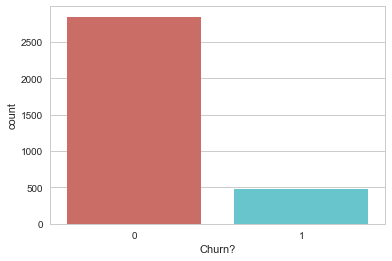

In [78]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='Churn?',data=data,palette= 'hls')
plt.show()

En la base de clientes hay 483 desertores

In [79]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
X_train.shape

(2499, 13)

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [81]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
X_train = train[col_names]
y_train = train['Churn?']
logreg.fit(X_train, y_train)
train['churn_pred'] = logreg.predict(X_train)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [82]:
# Predicción del test
y_pred = logreg.predict(X_test)

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[707,  12],
       [106,   9]], dtype=int64)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.98      0.92       719
          1       0.43      0.08      0.13       115

avg / total       0.81      0.86      0.81       834



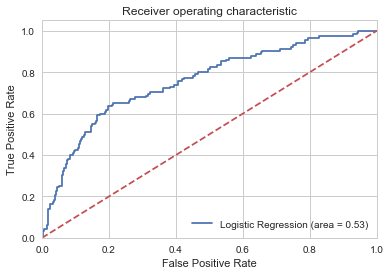

In [86]:
# Curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

La precisión del modelo es de 0.81. Sin embargo, es importante acalarar que el modelo presenta sobreajuste dado que la predicción de los verdaderos positivos respecto a los falsos negativos está muy desbalanceada. Para corregir esto, es necesario balancear la muestra de la variable respuesta donde solo el 14% de los registros presenta deserción.